In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter


# Data Importing and Formating

In [ ]:
df=pd.read_csv('data/faodata.csv')
df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,76,Brazil,5312,Area harvested,1610,"Coffee, green",1961,1961,ha,4383820.00,A,Official figure,NaN
1,QCL,Crops and livestock products,76,Brazil,5412,Yield,1610,"Coffee, green",1961,1961,kg/ha,508.40,A,Official figure,NaN
2,QCL,Crops and livestock products,76,Brazil,5510,Production,1610,"Coffee, green",1961,1961,t,2228704.00,A,Official figure,NaN
3,QCL,Crops and livestock products,76,Brazil,5312,Area harvested,1610,"Coffee, green",1962,1962,ha,4462657.00,A,Official figure,NaN
4,QCL,Crops and livestock products,76,Brazil,5412,Yield,1610,"Coffee, green",1962,1962,kg/ha,490.80,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,QCL,Crops and livestock products,1,World,5412,Yield,1610,"Coffee, green",2022,2022,kg/ha,891.60,E,Estimated value,NaN
1412,QCL,Crops and livestock products,1,World,5510,Production,1610,"Coffee, green",2022,2022,t,10733909.02,E,Estimated value,NaN
1413,QCL,Crops and livestock products,1,World,5312,Area harvested,1610,"Coffee, green",2023,2023,ha,12185894.00,E,Estimated value,NaN
1414,QCL,Crops and livestock products,1,World,5412,Yield,1610,"Coffee, green",2023,2023,kg/ha,908.00,E,Estimated value,NaN


In [17]:
df_pivot = (
    df
    .pivot_table(
        index=["Area", "Year"],
        columns="Element",
        values="Value"
    )
    .reset_index()
)
df_pivot

Element,Area,Year,Area harvested,Production,Yield
0,Brazil,1961,4383820.0,2228704.00,508.4
1,Brazil,1962,4462657.0,2190303.00,490.8
2,Brazil,1963,4286129.0,1650527.00,385.1
3,Brazil,1964,3696281.0,1042013.00,281.9
4,Brazil,1965,3511079.0,2294047.00,653.4
...,...,...,...,...,...
467,World,2019,11749101.0,10358649.66,881.7
468,World,2020,12064556.0,11233733.88,931.1
469,World,2021,12088063.0,10488327.40,867.7
470,World,2022,12039247.0,10733909.02,891.6


In [ ]:
countries = [
    "Brazil", "Colombia", "Honduras",
    "Indonesia", "Uganda", "Viet Nam","Ethiopia"
]


color_map = {
    "Brazil": "#1b9e77",       
    "Colombia": "#ffd92f",     
    "Honduras": "#80b1d3",     
    "Indonesia": "#e41a1c",     
    "Uganda": "#6a3d9a",       
    "Viet Nam": "#8b0000",      
    "Ethiopia": "#a6761d" ,     
    "Rest of World": "#7f7f7f"  
}





# Production and Area

In [ ]:
def build_world_stack(df_pivot, value_col):
    df_world = (
        df_pivot[df_pivot["Area"] == "World"]
        .set_index("Year")[[value_col]]
        .rename(columns={value_col: "World"})
    )

    dfs = []
    for country in countries:
        df_c = (
            df_pivot[df_pivot["Area"] == country]
            .set_index("Year")[[value_col]]
            .rename(columns={value_col: country})
        )
        dfs.append(df_c)

    df_all = pd.concat(dfs, axis=1)

    df_all["Rest of World"] = df_world["World"] - df_all.sum(axis=1)

    return df_all


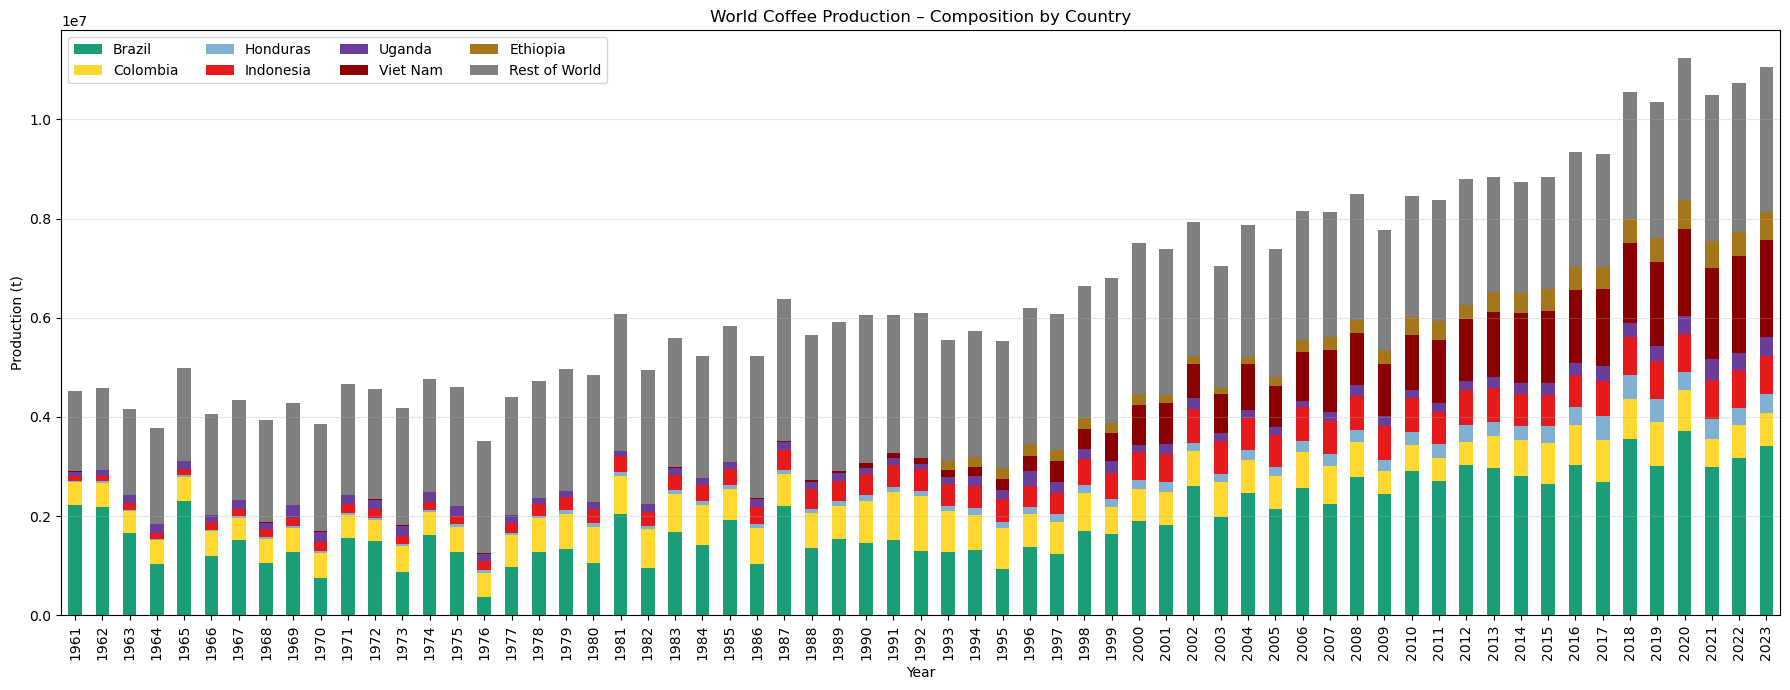

In [20]:
df_prod_stack = build_world_stack(df_pivot, "Production")

ax = df_prod_stack.plot(
    kind="bar",
    stacked=True,
    figsize=(18, 7),
    color=[color_map[c] for c in df_prod_stack.columns]
)

ax.set_title("World Coffee Production – Composition by Country")
ax.set_ylabel("Production (t)")
ax.set_xlabel("Year")
ax.legend(ncol=4)
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()


The stacked bar chart shows that world coffee production increases steadily over time, but with a markedly changing composition. Brazil remains the dominant producer throughout the entire period, while Viet Nam exhibits a sharp structural rise from the early 1990s onward, becoming a major contributor to global supply. In contrast, traditional producers display more gradual growth, and the relative share of the rest of the world declines. This indicates that global production growth has become increasingly concentrated in a small number of key countries rather than being evenly distributed.

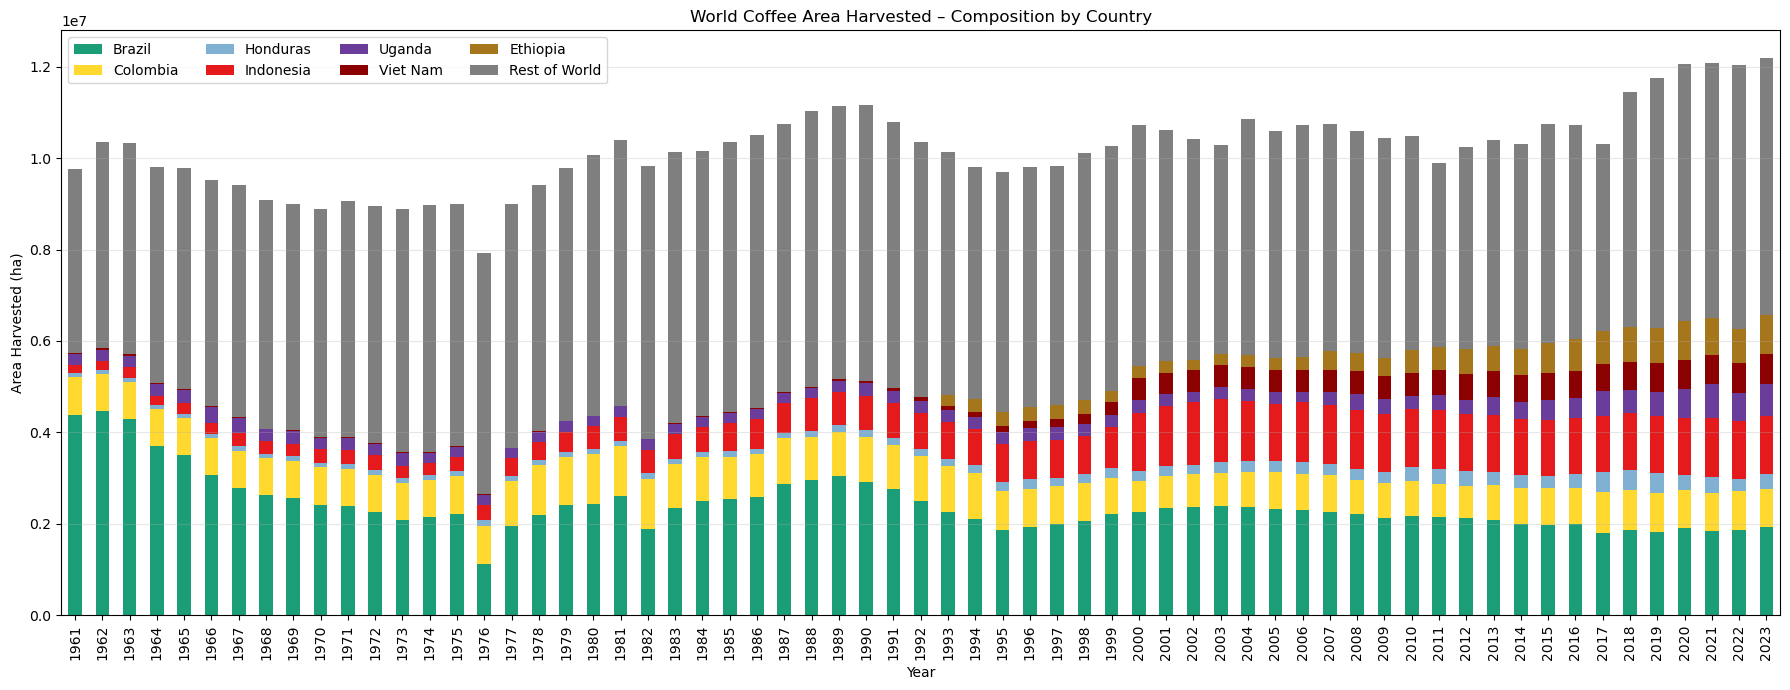

In [21]:
df_prod_stack = build_world_stack(df_pivot, "Area harvested")

ax = df_prod_stack.plot(
    kind="bar",
    stacked=True,
    figsize=(18, 7),
    color=[color_map[c] for c in df_prod_stack.columns]
)

ax.set_title("World Coffee Area Harvested – Composition by Country")
ax.set_ylabel("Area Harvested (ha)")
ax.set_xlabel("Year")
ax.legend(ncol=4)
ax.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()



The stacked bar chart indicates that the expansion of world coffee harvested area is considerably more moderate than the growth observed in production. Brazil maintains the largest harvested area throughout the period, but its relative share gradually declines, while Viet Nam and Indonesia show notable area expansion from the 1990s onward. At the same time, the rest of the world remains relatively stable, suggesting that long-run increases in global coffee output are driven primarily by productivity gains and structural reallocation rather than by broad-based land expansion.

<Figure size 1200x600 with 0 Axes>

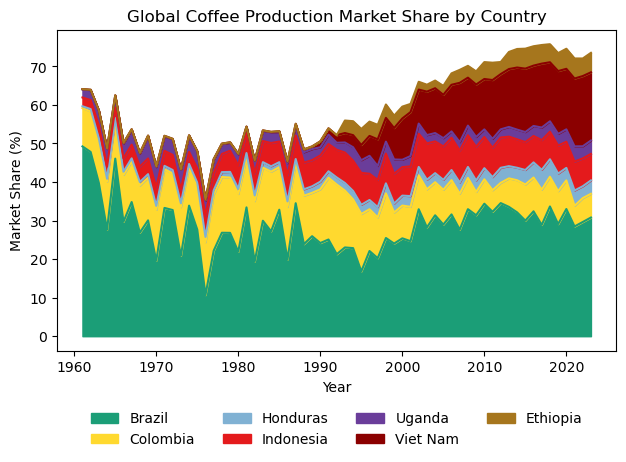

In [22]:
df_world = (
    df_pivot[df_pivot["Area"] == "World"]
    [["Year", "Production"]]
    .rename(columns={"Production": "world_production"})
)
df_share = (
    df_pivot[df_pivot["Area"] != "World"]
    .merge(df_world, on="Year", how="left")
)
df_share["market_share"] = (
    df_share["Production"] / df_share["world_production"]
)

df_share["market_share_pct"] = df_share["market_share"] * 100

pivot_share = df_share.pivot(
    index="Year",
    columns="Area",
    values="market_share_pct"
)

pivot_share = pivot_share.copy()

pivot_share["Rest of World"] = 100 - pivot_share[countries].sum(axis=1)

plot_order = [
    "Brazil",
    "Colombia",
    "Honduras",
    "Indonesia",
    "Uganda",
    "Viet Nam",
    "Ethiopia",

]


pivot_plot = pivot_share[plot_order]

colors = [color_map[c] for c in plot_order]

plt.figure(figsize=(12, 6))

pivot_plot.plot(
    kind="area",
    stacked=True,
    color=colors
)

plt.xlabel("Year")
plt.ylabel("Market Share (%)")
plt.title("Global Coffee Production Market Share by Country")

plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    frameon=False
)

plt.tight_layout()
plt.show()


Market share analysis reveals substantial structural changes in global coffee production. While Brazil remains the dominant producer throughout the period, the rapid rise of Viet Nam since the 1990s significantly reshaped the market. Other producers, such as Indonesia and Uganda, show steady growth, contributing to a more diversified global supply. These dynamics indicate that changes in production are driven not only by total output growth, but also by redistribution of market share among producing countries.


# Yeld

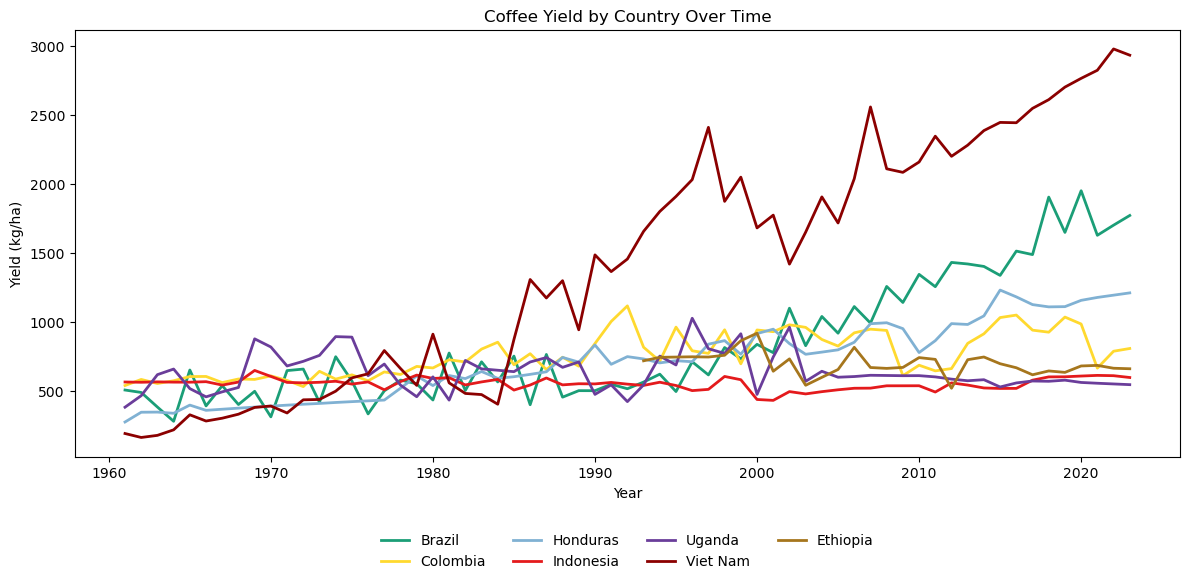

In [23]:
plt.figure(figsize=(12, 6))

for country in countries:
    data_c = df_pivot[df_pivot["Area"] == country]
    plt.plot(
        data_c["Year"],
        data_c["Yield"],
        label=country,
        color=color_map[country],
        linewidth=2
    )

plt.xlabel("Year")
plt.ylabel("Yield (kg/ha)")
plt.title("Coffee Yield by Country Over Time")

plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    frameon=False
)

plt.tight_layout()
plt.show()


The time series of coffee yield by country highlights substantial differences in absolute productivity levels across producers. Countries such as Viet Nam and Brazil exhibit clear long-term increases in yield, while others, including Indonesia, Uganda, and Ethiopia, remain at comparatively lower and more stable productivity levels.

However, the joint visualization of all countries on the same scale presents important limitations. Large differences in yield magnitude, particularly the rapid rise observed in Viet Nam, dominate the vertical axis and visually compress the trajectories of lower-yield producers. Additionally, year-to-year fluctuations introduce visual noise, making it difficult to compare long-term productivity trends across countries.

As a result, while the plot is informative for identifying absolute productivity gaps, it is not well suited for comparing relative growth dynamics or technological progress between countries.


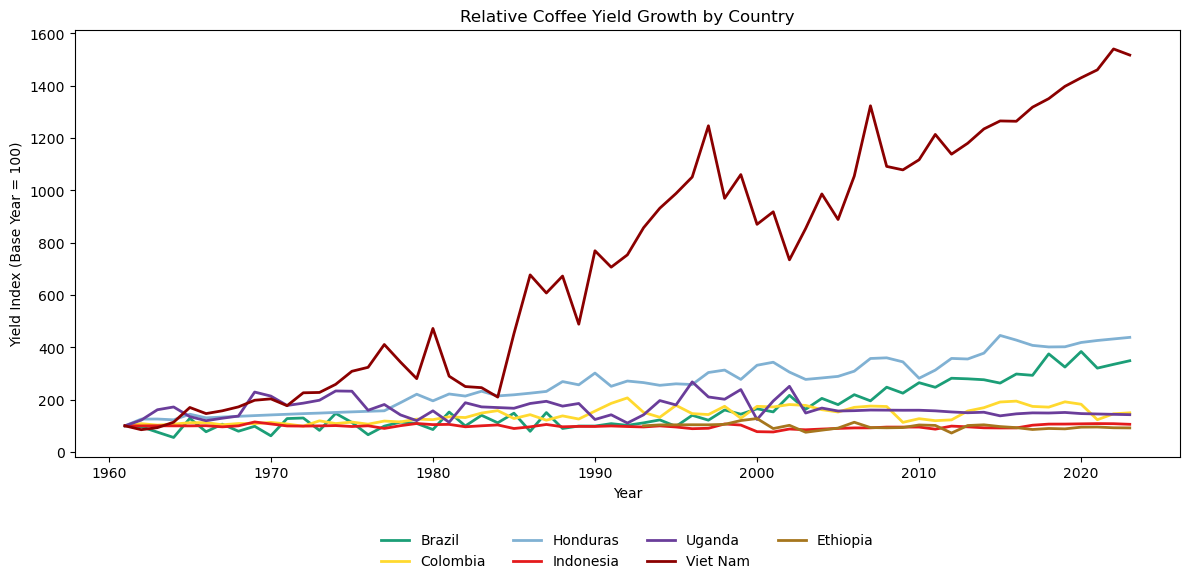

In [24]:
df_yield_norm = df_pivot[df_pivot["Area"].isin(countries)].copy()

df_yield_norm["yield_index"] = (
    df_yield_norm
    .groupby("Area")["Yield"]
    .transform(lambda x: x / x.iloc[0] * 100)
)
plt.figure(figsize=(12, 6))

for country in countries:
    data_c = df_yield_norm[df_yield_norm["Area"] == country]
    plt.plot(
        data_c["Year"],
        data_c["yield_index"],
        label=country,
        color=color_map[country],
        linewidth=2
    )

plt.xlabel("Year")
plt.ylabel("Yield Index (Base Year = 100)")
plt.title("Relative Coffee Yield Growth by Country")

plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=4,
    frameon=False
)

plt.tight_layout()
plt.show()


To compare productivity dynamics across countries with very different yield levels, coffee yields were transformed into an indexed series with a common base year. For each country, the yield in the first available year was set to 100, and all subsequent values represent relative changes with respect to this baseline. This normalization allows the analysis to focus on growth trajectories and productivity gains, rather than absolute yield levels.

The indexed yield trends reveal substantial heterogeneity in productivity growth across coffee-producing countries. Viet Nam stands out with an exceptionally rapid and sustained increase in yield, reflecting significant structural and technological advances since the late 1980s. Brazil also shows a clear upward trajectory, though at a more gradual and consistent pace, indicating steady improvements in productivity over time.

Honduras exhibits notable relative growth, particularly from the 1990s onward, while Colombia and Uganda display more moderate increases, suggesting relatively stable productivity levels. Ethiopia and Indonesia remain closer to their initial yield levels, indicating slower productivity growth or stronger structural constraints.

Overall, this analysis highlights that long-term changes in global coffee production capacity are driven not only by the expansion of harvested area, but also by highly uneven productivity gains across producing countries. The indexed representation provides a clearer view of these dynamics by mitigating scale differences and emphasizing relative technological progress.

# Area vs Production: Extensive vs Intensive Growth


C:\Users\ferna\AppData\Local\Temp\ipykernel_28608\4078129542.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


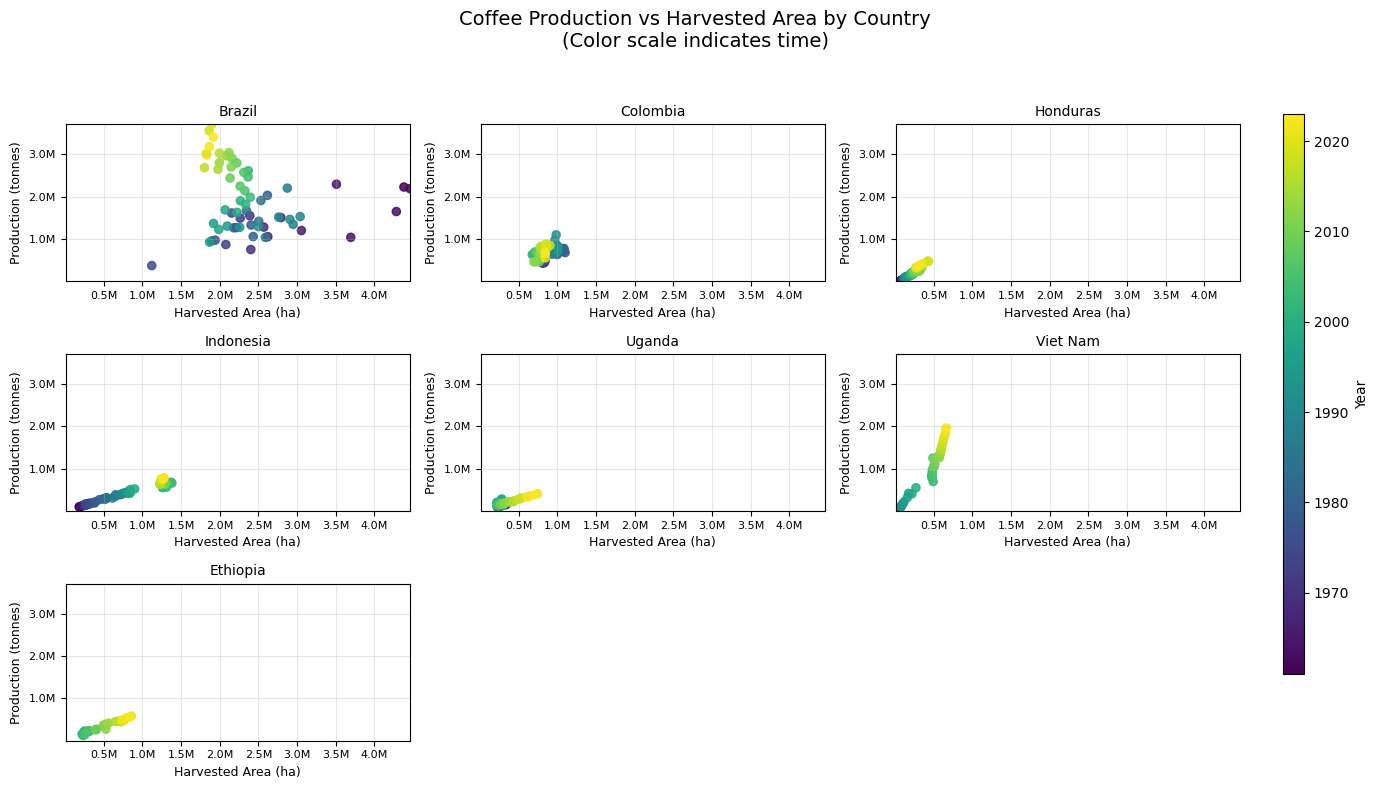

In [ ]:
df_no_world = df_pivot[df_pivot["Area"] != "World"]

x_min, x_max = df_no_world["Area harvested"].min(), df_no_world["Area harvested"].max()
y_min, y_max = df_no_world["Production"].min(), df_no_world["Production"].max()

year_min, year_max = df_no_world["Year"].min(), df_no_world["Year"].max()
norm = mcolors.Normalize(vmin=year_min, vmax=year_max)
cmap = cm.viridis

countries = [
    "Brazil", "Colombia", "Honduras",
    "Indonesia", "Uganda", "Viet Nam", "Ethiopia"
]

n_cols = 3
n_rows = int(np.ceil(len(countries) / n_cols))

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(14, 8),
    sharex=True,
    sharey=True
)
axes = axes.flatten()

def millions(x, pos):
    return f"{x/1e6:.1f}M"

for i, country in enumerate(countries):
    ax = axes[i]
    data_c = df_no_world[df_no_world["Area"] == country].sort_values("Year")

    sc = ax.scatter(
        data_c["Area harvested"],
        data_c["Production"],
        c=data_c["Year"],
        cmap=cmap,
        norm=norm,
        s=35,
        alpha=0.85
    )

    ax.set_title(country, fontsize=10)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.tick_params(
        axis="both",
        which="both",
        labelbottom=True,
        labelleft=True,
        labelsize=8
    )

    ax.xaxis.set_major_formatter(FuncFormatter(millions))
    ax.yaxis.set_major_formatter(FuncFormatter(millions))

    ax.set_xlabel("Harvested Area (ha)", fontsize=9)
    ax.set_ylabel("Production (tonnes)", fontsize=9)

    ax.grid(True, alpha=0.3)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

cax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]

cbar = fig.colorbar(
    cm.ScalarMappable(norm=norm, cmap=cmap),
    cax=cax
)
cbar.set_label("Year")

fig.suptitle(
    "Coffee Production vs Harvested Area by Country\n(Color scale indicates time)",
    fontsize=14
)

plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

Brazil stands out as a particularly illustrative case. Earlier observations are concentrated at higher harvested areas, while more recent points shift leftward, indicating a reduction in planted area. Despite this contraction, production levels remain stable or even increase, revealing substantial gains in productivity. This pattern suggests that technological improvements, better crop management, and yield-enhancing practices have compensated for — and in some periods outweighed — reductions in cultivated land.

In contrast, Viet Nam exhibits a strong upward trajectory with relatively modest changes in harvested area, reflecting productivity-driven expansion following structural reforms and intensive farming adoption since the 1990s. Colombia and Ethiopia show more compact clusters, indicating gradual growth under land and institutional constraints, while Honduras and Uganda operate at smaller scales with steady but limited expansion.

Overall, the comparison highlights heterogeneous development paths in global coffee production. While some producers rely primarily on area expansion, others — notably Brazil — demonstrate that sustained or increased output can be achieved through efficiency gains, underscoring the central role of productivity in long-term agricultural growth.